# Walmart Kaggle Project

## Authors:  Shijie Wang and Matthew Odom

In [1]:
%ls

README.md                    sample_submission.csv
WalmartKaggleSubmission.csv  test.csv
Walmart_Script.ipynb         test.csv.zip
image.png                    train.csv


### Install packages necessary for computation

In [2]:
import pandas as pd # data manipulation
import numpy as np # data manipulation
import statsmodels.api as sm # used for modeling
import random # subsetting and algorithm build

### Load the  Training Dataset

In [3]:
# load and prepare the training dataset for modeling
train = pd.read_csv("train.csv")
train = train.dropna()
train = train.ix[:, (train.columns != 'FinelineNumber') & (train.columns != 'Upc')]
train

TripType  VisitNumber Weekday  ScanCount     DepartmentDescription
0            999            5  Friday         -1        FINANCIAL SERVICES
1             30            7  Friday          1                     SHOES
2             30            7  Friday          1             PERSONAL CARE
3             26            8  Friday          2     PAINT AND ACCESSORIES
4             26            8  Friday          2     PAINT AND ACCESSORIES
5             26            8  Friday          2     PAINT AND ACCESSORIES
6             26            8  Friday          1     PAINT AND ACCESSORIES
7             26            8  Friday          1     PAINT AND ACCESSORIES
8             26            8  Friday          1     PAINT AND ACCESSORIES
9             26            8  Friday         -1     PAINT AND ACCESSORIES
10            26            8  Friday          1               DSD GROCERY
11            26            8  Friday          2     PAINT AND ACCESSORIES
12            26            8  Friday          1     MEAT - FRESH & FROZEN
13            26            8  Friday          1     PAINT AND ACCESSORIES
14            26            8  Friday         -1     PAINT AND ACCESSORIES
15            26            8  Friday          2     PAINT AND ACCESSORIES
16            26            8  Friday          1     PAINT AND ACCESSORIES
17            26            8  Friday          1     PAINT AND ACCESSORIES
18            26            8  Friday          2                     DAIRY
19            26            8  Friday          1         PETS AND SUPPLIES
20            26            8  Friday          2     PAINT AND ACCESSORIES
21            26            8  Friday          1  HOUSEHOLD CHEMICALS/SUPP
22            26            8  Friday          1     PAINT AND ACCESSORIES
23            26            8  Friday          1     PAINT AND ACCESSORIES
24            26            8  Friday          3         PETS AND SUPPLIES
26             8            9  Friday          1       IMPULSE MERCHANDISE
27             8            9  Friday          1                   PRODUCE
28             8            9  Friday          1                   PRODUCE
29             8           10  Friday          1               DSD GROCERY
30             8           10  Friday          1   CANDY, TOBACCO, COOKIES
...          ...          ...     ...        ...                       ...
647024        39       191345  Sunday          2              PHARMACY OTC
647025        39       191345  Sunday          1         GROCERY DRY GOODS
647026        39       191345  Sunday          1         GROCERY DRY GOODS
647027        39       191345  Sunday          1                COMM BREAD
647028        39       191345  Sunday          1               DSD GROCERY
647029        39       191345  Sunday          1               ELECTRONICS
647030        39       191345  Sunday          2                COMM BREAD
647031        39       191345  Sunday          1                    BEAUTY
647032        39       191345  Sunday          2               DSD GROCERY
647033        39       191345  Sunday          1  HOUSEHOLD CHEMICALS/SUPP
647034        39       191345  Sunday          1     HOUSEHOLD PAPER GOODS
647035        39       191346  Sunday          1         GROCERY DRY GOODS
647036        39       191346  Sunday          1                   PRODUCE
647037        39       191346  Sunday          1         GROCERY DRY GOODS
647038        39       191346  Sunday          1         GROCERY DRY GOODS
647039        39       191346  Sunday          1               DSD GROCERY
647040        39       191346  Sunday          1  HOUSEHOLD CHEMICALS/SUPP
647041        39       191346  Sunday          1         GROCERY DRY GOODS
647042        39       191346  Sunday          1     MEAT - FRESH & FROZEN
647043        39       191346  Sunday          1              PHARMACY OTC
647044        39       191346  Sunday          1         GROCERY DRY GOODS
647045        39       191346  Su

#### Visit number represents a basket of goods
* We want to aggregate the backet of goods by Department Description

In [4]:
# aggregate ScanCount by DepartmentDescription for each VisitNumber
data_1 = train.pivot_table(index = 'VisitNumber', columns = 'DepartmentDescription', values = 'ScanCount', 
                           aggfunc = np.sum, fill_value=0)
data_1['VisitNumber'] = data_1.index # Technique creates index from Visit Number. We must add it back in.

data_1

DepartmentDescription  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  \
VisitNumber                                                          
5                               0            0           0       0   
7                               0            0           0       0   
8                               0            0           0       0   
9                               0            0           0       0   
10                              0            0           0       0   
11                              0            0           0       0   
12                              0            0           0       0   
15                              0            0           0       0   
17                              0            0           0       0   
19                              0            1           0       0   
20                              0            0           0       0   
23                              0            0           0       0   
25                              0            0           0       0   
26                              0            0           0       0   
28                              0            0           0       2   
29                              0            0           0       0   
30                              0            0           0       0   
31                              0            0           0       1   
32                              0            0           0       0   
33                              0            0           0       0   
40                              0            0           0       0   
41                              0            0           0       0   
42                              0            0           0       0   
43                              0            0           0       0   
45                              0            0           0       0   
47                              0            0           0       0   
49                              0            0           0       0   
50                              0            0           0       0   
51                              0            0           0       0   
53                              0            0           0       0   
...                           ...          ...         ...     ...   
191276                          0            0           0       0   
191277                          0            0           0       0   
191280                          0            0           0       0   
191283                          0            0           0       0   
191286                          0            0           0       0   
191287                          0            0           0       0   
191289                          0            0           0       0   
191291                          0            0           0       0   
191293                          0            0           0       0   
191298                          0            0           1       1   
191301                          0            0           0       0   
191304                          0            0           0       0   
191305                          0            0           0       0   
191311                          0            0           0       0   
191312                          0            0           0       0   
191313                          0            0           0       0   
191318                          0            0           0       0   
191322                          0            0           0       0   
191324                          0            0           3       1   
191326                          0            0           0       0   
191329                          0            0           0       0   
191331                          0            0           0       0   
191335                          0            0           0       0   
191337                          0            0           0       1   
191342    

#### With this given technique, we loose relevant data and must add it back
* Visit Number now becomes an ID variable, and we can use it to get back information

In [5]:
# get unique Trip Type, VisitNumber, and Weekday
temp = train.drop(train.columns[[3,4]], axis=1)
temp = temp.drop_duplicates()
temp

TripType  VisitNumber Weekday
0            999            5  Friday
1             30            7  Friday
3             26            8  Friday
26             8            9  Friday
29             8           10  Friday
32            35           11  Friday
36            41           12  Friday
43            21           15  Friday
51             6           17  Friday
55            42           19  Friday
64             7           20  Friday
66             9           23  Friday
68             8           25  Friday
71            39           26  Friday
80            25           28  Friday
88             8           29  Friday
89             9           30  Friday
90             8           31  Friday
92             8           32  Friday
93             8           33  Friday
95             8           40  Friday
97             8           41  Friday
99             8           42  Friday
100           38           43  Friday
104            8           45  Friday
108           35           47  Friday
111           15           49  Friday
116            9           50  Friday
117            8           51  Friday
119            8           53  Friday
...          ...          ...     ...
646756        21       191276  Sunday
646759        44       191277  Sunday
646777         8       191280  Sunday
646780        44       191283  Sunday
646790        40       191286  Sunday
646814        26       191287  Sunday
646816         8       191289  Sunday
646817         8       191291  Sunday
646819        36       191293  Sunday
646841        40       191298  Sunday
646862        42       191301  Sunday
646869        36       191304  Sunday
646875        31       191305  Sunday
646876         9       191311  Sunday
646878        42       191312  Sunday
646894        30       191313  Sunday
646898         7       191318  Sunday
646905        38       191322  Sunday
646919        40       191324  Sunday
646939        38       191326  Sunday
646950        24       191329  Sunday
646970         9       191331  Sunday
646971        32       191335  Sunday
646980        38       191337  Sunday
647008         8       191342  Sunday
647010        25       191343  Sunday
647017        22       191344  Sunday
647022        39       191345  Sunday
647035        39       191346  Sunday
647052         8       191347  Sunday

[94247 rows x 3 columns]

#### Number of rows match, and we can now merge with final Training Dataset
* The final categorical variable, Weekday, is broken out into dummy variables

In [6]:
train = pd.merge(temp, data_1, on = 'VisitNumber')
train = pd.get_dummies(train)
train

TripType  VisitNumber  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  \
0           999            5           0            0           0       0   
1            30            7           0            0           0       0   
2            26            8           0            0           0       0   
3             8            9           0            0           0       0   
4             8           10           0            0           0       0   
5            35           11           0            0           0       0   
6            41           12           0            0           0       0   
7            21           15           0            0           0       0   
8             6           17           0            0           0       0   
9            42           19           0            1           0       0   
10            7           20           0            0           0       0   
11            9           23           0            0           0       0   
12            8           25           0            0           0       0   
13           39           26           0            0           0       0   
14           25           28           0            0           0       2   
15            8           29           0            0           0       0   
16            9           30           0            0           0       0   
17            8           31           0            0           0       1   
18            8           32           0            0           0       0   
19            8           33           0            0           0       0   
20            8           40           0            0           0       0   
21            8           41           0            0           0       0   
22            8           42           0            0           0       0   
23           38           43           0            0           0       0   
24            8           45           0            0           0       0   
25           35           47           0            0           0       0   
26           15           49           0            0           0       0   
27            9           50           0            0           0       0   
28            8           51           0            0           0       0   
29            8           53           0            0           0       0   
...         ...          ...         ...          ...         ...     ...   
94217        21       191276           0            0           0       0   
94218        44       191277           0            0           0       0   
94219         8       191280           0            0           0       0   
94220        44       191283           0            0           0       0   
94221        40       191286           0            0           0       0   
94222        26       191287           0            0           0       0   
94223         8       191289           0            0           0       0   
94224         8       191291           0            0           0       0   
94225        36       191293           0            0           0       0   
94226        40       191298           0            0           1       1   
94227        42       191301           0            0           0       0   
94228        36       191304           0            0           0       0   
94229        31       191305           0            0           0       0   
94230         9       191311           0            0           0       0   
94231        42       191312           0            0           0       0   
94232        30       191313           0            0           0       0   
94233         7       191318           0            0           0       0   
94234        38       191322           0            0           0       0   
94235        40       191324           0            0           3       1   
94236        38       191326           0            0           0       0   
942

### Load and prepare the testing dataset for modeling
* Similar technique used as above
* Note, the testing dataset does not contain Trip Type.  Output must be submitted for evaluation.

In [7]:
# load and prepare the testing dataset for modeling
test = pd.read_csv("test.csv")
test = test.dropna()
test = test.ix[:, (test.columns != 'FinelineNumber') & (test.columns != 'Upc')]

# aggregate ScanCount by DepartmentDescription for each VisitNumber
data_1 = test.pivot_table(index = 'VisitNumber', columns = 'DepartmentDescription', values = 'ScanCount', 
                           aggfunc = np.sum, fill_value=0)
data_1['VisitNumber'] = data_1.index

# get unique Trip Type, VisitNumber, and Weekday
temp = test.drop(test.columns[[2,3]], axis=1)
temp = temp.drop_duplicates()

test = pd.merge(temp, data_1, on = 'VisitNumber')
test = pd.get_dummies(test)

X_test = test.ix[:,test.columns != 'VisitNumber']
X_test['Intercept'] = 1

X_test

1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  BATH AND SHOWER  BEAUTY  \
0               0            0           0       0                0       0   
1               0            0           0       1                0       0   
2               0            0           0       0                0       0   
3               0            0           0       0                0       0   
4               0            0           0       0                0       0   
5               0            0           0       0                0       0   
6               0            0           0       0                0       0   
7               0            0           0       0                0       0   
8               0            0           0       0                0       0   
9               0            0           0       0                0       0   
10              0            0           0       0                0       0   
11              0            0           0       0                0       0   
12              0            0           0       0                0       0   
13              0            0           0       0                0       0   
14              0            0           0       0                0       0   
15              0            0           0       0                0       0   
16              0            0           0       0                0       0   
17              0            0           0       0                0       0   
18              0            0           0       0                0       0   
19              0            0           0       0                0       0   
20              0            0           0       0                0       0   
21              0            0           0       0                0       0   
22              0            0           0       0                0       0   
23              0            0           0       0                0       0   
24              0            0           0       0                0       0   
25              0            0           0       0                0       0   
26              0            0           0       0                0       0   
27              0            0           0       0                0       0   
28              0            0           0       0                0       0   
29              0            0           0       3                0       0   
...           ...          ...         ...     ...              ...     ...   
94258           0            0           0       0                0       0   
94259           0            0           0       0                0       0   
94260           0            0           0       1                0       1   
94261           0            0           0       0                0       0   
94262           0            0           0       0                0       0   
94263           0            0           0       0                0       0   
94264           0            0           0       0                0       0   
94265           0            0           0       0                0       0   
94266           0            0           0       0                0       0   
94267           0            0           0       0                0       0   
94268           0            0           0       0                0       0   
94269           0            0           0       1                0       1   
94270           0            0           0       0                0       0   
94271           0            0           0       0                3       1   
94272           0            0           0       2                0       0   
94273           0            0           0       0                2       0   
94274           0            0           0       0                0       0   
94275           0            0           0       0                0       0   
94276           0            0           0       0       

* Here, we subset for algorithm build.

In [13]:
#data = train[train["TripType"] <= 10]
#data = data.sample(50000)
data = train

### Visualizing the Dataset
* Let's look at clothing departments

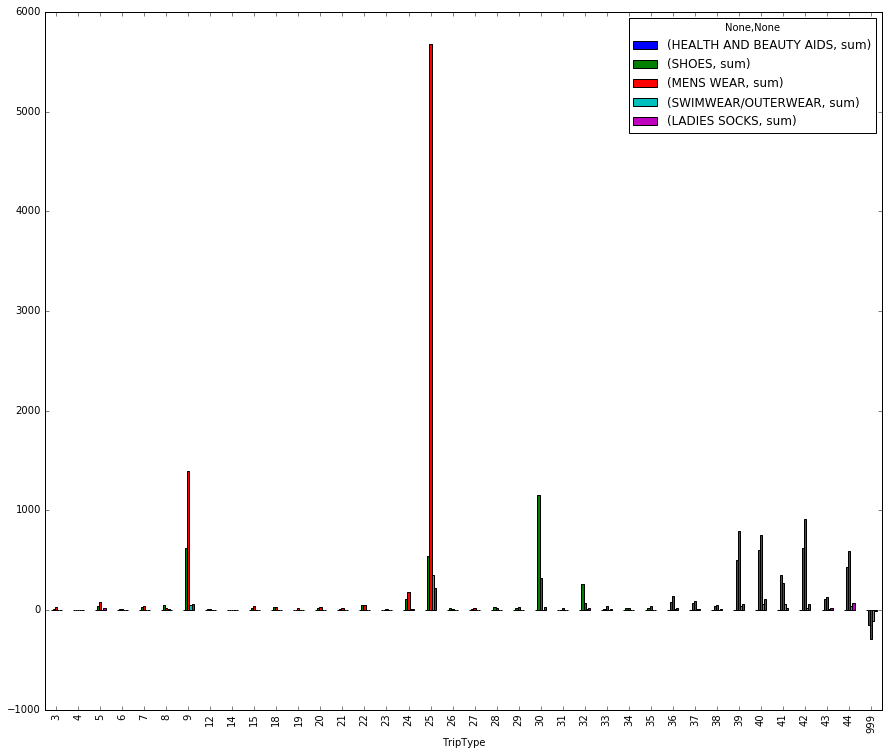

In [19]:
grouped = data.groupby('TripType')
tem_b = grouped['HEALTH AND BEAUTY AIDS', 'SHOES', 'MENS WEAR', 'SWIMWEAR/OUTERWEAR', 'LADIES SOCKS'].agg([np.sum])
%matplotlib inline

tem_b.plot(kind='bar', figsize = (15,12.5))

* Looking at the Candy Department

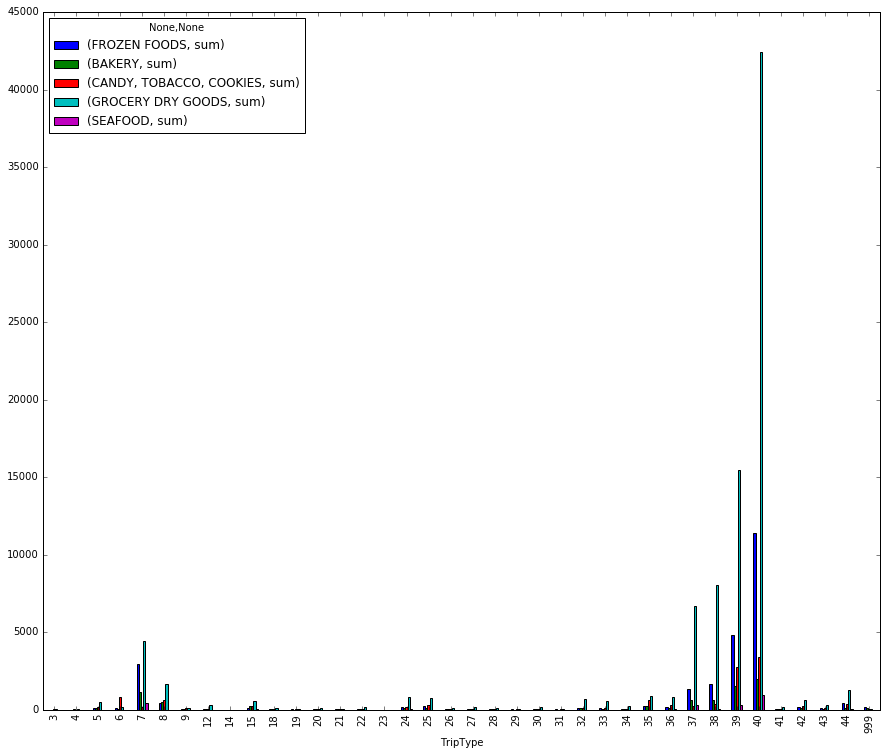

In [21]:
grouped = data.groupby('TripType')
tem_c = grouped['FROZEN FOODS', 'BAKERY', 'CANDY, TOBACCO, COOKIES', 'GROCERY DRY GOODS', 'SEAFOOD'].agg([np.sum])
%matplotlib inline

tem_c.plot(kind='bar', figsize = (15,12.5))

### Create a loop for modeling each TripType
* Append the results into a submission file 
* Stack the output of the test into single submission

<img src="image.png"/>

In [14]:
TripTypes = data.TripType.unique()
submission = pd.DataFrame()

for i in TripTypes:
    print "Working on TripType " + str(i)
    
    # reset dataset for next iteration
    sample = data
    sample = sample.dropna()
    
    # convert independent variable into binary
    sample.TripType = np.where(sample.TripType != i, 0, 1) 
    sample['Intercept'] = 1
    
    # set up model
    X = sample.ix[:,(sample.columns != 'TripType') & (sample.columns != 'VisitNumber') & (sample.columns != 'HEALTH AND BEAUTY AIDS')]
    y = sample.ix[:,sample.columns == 'TripType']
    
    model = sm.OLS(y,X)
    results = model.fit()
    #results.summary()
    
    # predict test dataset values
    yhat = pd.DataFrame(results.predict(X_test)) # this should be results.predict(test)
    yhat.columns = ["TripType_%s" % i]
    
    # append columns to submission
    submission = submission.join(yhat, how = "outer")
    
print "All done"

Working on TripType 999
Working on TripType 30
Working on TripType 26
Working on TripType 8
Working on TripType 35
Working on TripType 41
Working on TripType 21
Working on TripType 6
Working on TripType 42
Working on TripType 7
Working on TripType 9
Working on TripType 39
Working on TripType 25
Working on TripType 38
Working on TripType 15
Working on TripType 36
Working on TripType 20
Working on TripType 37
Working on TripType 32
Working on TripType 40
Working on TripType 5
Working on TripType 3
Working on TripType 4
Working on TripType 24
Working on TripType 33
Working on TripType 43
Working on TripType 31
Working on TripType 27
Working on TripType 34
Working on TripType 18
Working on TripType 29
Working on TripType 44
Working on TripType 19
Working on TripType 23
Working on TripType 22
Working on TripType 28
Working on TripType 14
Working on TripType 12
All done


### For each Visit Number, we now have the probability of that visit number belonging to each Trip Type.

In [15]:
submission

TripType_999  TripType_30  TripType_26  TripType_8  TripType_35  \
0          0.132898     0.077497     0.003443    0.174057    -0.002392   
1          0.106527     0.007726     0.003031    0.178540     0.080542   
2          0.155996     0.009149     0.004137    0.206422     0.017420   
3          0.146221     0.008242     0.003293    0.194836     0.015415   
4          0.155996     0.009149     0.004137    0.206422     0.017420   
5          0.146852     0.008439     0.003909    0.196321     0.034645   
6          0.030031     0.005765    -0.002019    0.090758     0.103306   
7          0.054295     0.003813     0.000942    0.172074     0.228498   
8          0.104874     0.006921     0.002731    0.177517     0.099688   
9          0.064747     0.003789    -0.001322    0.098580     0.063467   
10         0.142704     0.009578     0.004115    0.198310     0.036184   
11         0.148178     0.008057     0.004406    0.199734     0.018875   
12         0.106777     0.005363     0.002542    0.186007     0.125170   
13         0.133675     0.009026     0.003846    0.197151     0.060638   
14         0.148178     0.008057     0.004406    0.199734     0.018875   
15         0.153961     0.008637     0.004011    0.199112     0.010162   
16         0.118771     0.006247     0.001991    0.180204     0.013737   
17         0.146967     0.008597     0.003869    0.205263     0.041872   
18         0.139149     0.007504     0.004138    0.198575     0.043329   
19         0.149595     0.008711     0.003956    0.201045     0.016115   
20         0.134884     0.008485     0.004384    0.191623     0.037642   
21         0.069557     0.005822     0.001740    0.133825     0.086502   
22         0.155996     0.009149     0.004137    0.206422     0.017420   
23         0.134287     0.007211     0.002179    0.181619     0.011856   
24         0.155996     0.009149     0.004137    0.206422     0.017420   
25         0.138725     0.007565     0.003649    0.191952     0.032551   
26         0.154978     0.008893     0.004074    0.202767     0.013792   
27         0.146967     0.008597     0.003869    0.205263     0.041872   
28         0.132658     0.008447    -0.001109    0.184400     0.011349   
29        -0.171644    -0.022805    -0.013725   -0.137545     0.132198   
...             ...          ...          ...         ...          ...   
94258     -0.051081     0.002753    -0.006497    0.033022     0.148392   
94259     -0.530624    -0.025814    -0.017700   -0.493987    -0.026121   
94260      0.052959     0.000049    -0.004887    0.095551    -0.046244   
94261      0.001476     0.069977    -0.007407    0.026031    -0.021708   
94262      0.134916     0.011121     0.003747    0.171314    -0.001982   
94263      0.150061     0.012179     0.004259    0.189609     0.005207   
94264      0.144823     0.012246     0.002858    0.189826     0.011898   
94265      0.086378     0.001040     0.002645    0.073470    -0.016365   
94266      0.064241     0.013728     0.069460    0.135549     0.106382   
94267      0.125643     0.009435     0.000065    0.168720     0.011003   
94268      0.123934     0.009962     0.002676    0.164966     0.037489   
94269     -0.145866     0.061934    -0.011089   -0.295304    -0.293316   
94270      0.140133     0.012355     0.004005    0.199746     0.065353   
94271     -0.030466     0.009040    -0.021901   -0.060904    -0.032597   
94272     -0.061808    -0.009257    -0.018272   -0.045420     0.012135   
94273      0.130970     0.007985     0.003285    0.176611     0.044634   
94274      0.140945     0.011339     0.003421    0.172863     0.003084   
94275      0.133825     0.011246     0.003627    0.169716    -0.000408   
94276      0.103891     0.009406     0.001781    0.121627    -0.005636   
94277      0.068039    -0.001936     0.002946    0.133124     0.042736   
94278      0.084072     0.005094    -0.001283    0.091042    -0.051693   
94279      0.136930     0.008202     0.003417    0.169248     0.009706   
94280      

### Clean up the submission file 
* For submission purposes, WalMart has specific conditions regarding submission.
 * Replace the highest likelihood with one
* Append the VisitNumber for Kaggle evaluation

In [16]:
submission = submission.sort_index(axis=1)
submission = submission.apply(lambda row: np.where(row == max(row), 1, 0), axis = 1)
submission = pd.DataFrame(test['VisitNumber']).join(submission)
submission.to_csv("WalmartKaggleSubmission.csv")

submission

VisitNumber  TripType_12  TripType_14  TripType_15  TripType_18  \
0                1            0            0            0            0   
1                2            0            0            0            0   
2                3            0            0            0            0   
3                4            0            0            0            0   
4                6            0            0            0            0   
5               13            0            0            0            0   
6               14            0            0            0            0   
7               16            0            0            0            0   
8               18            0            0            0            0   
9               21            0            0            0            0   
10              22            0            0            0            0   
11              24            0            0            0            0   
12              27            0            0            0            0   
13              34            0            0            0            0   
14              35            0            0            0            0   
15              36            0            0            0            0   
16              37            0            0            0            0   
17              38            0            0            0            0   
18              39            0            0            0            0   
19              44            0            0            0            0   
20              46            0            0            0            0   
21              48            0            0            0            0   
22              52            0            0            0            0   
23              58            0            0            0            0   
24              59            0            0            0            0   
25              60            0            0            0            0   
26              62            0            0            0            0   
27              64            0            0            0            0   
28              65            0            0            0            0   
29              66            0            0            0            0   
...            ...          ...          ...          ...          ...   
94258       191299            0            0            0            0   
94259       191300            0            0            0            0   
94260       191302            0            0            0            0   
94261       191303            0            0            0            0   
94262       191306            0            0            0            0   
94263       191307            0            0            0            0   
94264       191308            0            0            0            0   
94265       191309            0            0            0            0   
94266       191310            0            0            0            0   
94267       191314            0            0            0            0   
94268       191315            0            0            0            0   
94269       191316            0            0            0            0   
94270       191317            0            0            0            0   
94271       191319            0            0            0            0   
94272       191320            0            0            0            0   
94273       191321            0            0            0            0   
94274       191323            0            0            0            0   
94275       191325            0            0            0            0   
94276       191327            0            0            0            0   
94277       191328            0            0            0            0   
94278       191330            0            0            0            0   
94279       191332            0            0            0            0   
94280      